In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
#Read the first csv file clinicaltrial_data.csv and convert that into dataframe
clinical = ('clinicaltrial_data.csv')
clinical = pd.read_csv(clinical)
clinical_df = pd.DataFrame(clinical)
clinical_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [4]:
#Read the second csv file mouse_drug_data.csv and convert that into dataframe
mouse_drug = ('mouse_drug_data.csv')
mouse_drug = pd.read_csv(mouse_drug)
mouse_drug_df = pd.DataFrame(mouse_drug)
mouse_drug_df = mouse_drug_df.sort_values('Drug')
drug_test = pd.merge(clinical_df, mouse_drug_df, on = "Mouse ID", how = 'outer')
drug_test.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin

In [5]:
drug_test_1 = drug_test.drop(columns = ['Mouse ID','Metastatic Sites'])
drug_test_1 = drug_test_1.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
drug_test_df = pd.DataFrame(drug_test_1)
drug_df = drug_test_df.unstack(level = 0)
drug_df.columns = drug_df.columns.droplevel()
drug_df.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

In [6]:
x_axis = list(range(0, 50, 5))

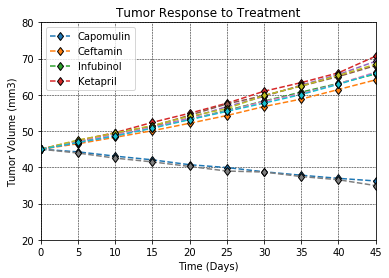

In [7]:
for drug in drug_df.columns: 
    plt.plot(x_axis, drug_df[drug], marker = "d", markeredgecolor = "black", linestyle = 'dashed', label = drug)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20, 80)
plt.xlim(0, 45, 5)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril"])
plt.savefig('Tumor_Response_to_Treatment.png')
#need to add error bar within it

In [8]:
drug_meta = drug_test.drop(columns = ['Mouse ID','Tumor Volume (mm3)'])
drug_meta = drug_meta.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
drug_meta = pd.DataFrame(drug_meta)
drug_meta_df = drug_meta.unstack(level = 0)
drug_meta_df.columns = drug_meta_df.columns.droplevel()
drug_meta_df.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118

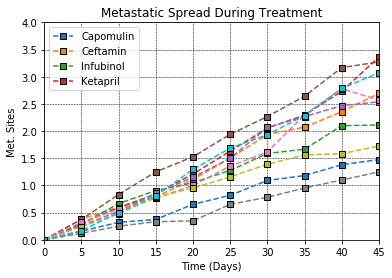

In [9]:
for drug in drug_meta_df.columns: 
    plt.plot(x_axis, drug_meta_df[drug], marker = "s",markeredgecolor = "black", linestyle = 'dashed', label = drug)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.ylim(0.0, 4.0, 0.5)
plt.xlim(0, 45, 5)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril"])
plt.savefig('Metastatic_Spread_During_Treatment.png')
#need to add error bar within it

In [10]:
drug_survive = drug_test.drop(columns = ['Tumor Volume (mm3)','Metastatic Sites'])
drug_survive = drug_survive.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
drug_survive_df = pd.DataFrame(drug_survive)
survive_df = drug_survive_df.unstack(level = 0)
survive_df.columns = survive_df.columns.droplevel()
survive_df.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

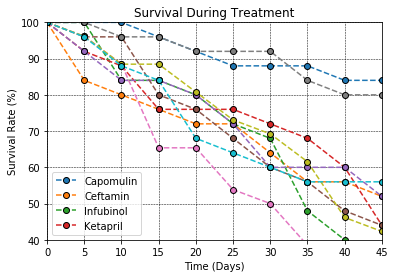

In [11]:
for drug in survive_df.columns: 
    plt.plot(x_axis, (survive_df[drug]/survive_df[drug][0])*100, marker = "o",markeredgecolor = "black", linestyle = 'dashed', label = drug)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.ylim(40, 100, 10)
plt.xlim(0, 45, 5)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril"], loc = 'best')
plt.savefig('Survival_During_Treatment.png')

In [12]:
total_change = pd.DataFrame()
drug_name = []
change = []
for drug in drug_df.columns: 
    percentage_change = ((drug_df[drug][0] - drug_df[drug][45])/drug_df[drug][0])*100
    change.append(percentage_change)
    drug_name.append(drug)
total_change['Total % Tumor Volume Change'] = change
total_change['Drug'] = drug_name
total_change = total_change[['Drug', 'Total % Tumor Volume Change']]
total_change

Drug  Total % Tumor Volume Change
0  Capomulin                    19.475303
1   Ceftamin                   -42.516492
2  Infubinol                   -46.123472
3   Ketapril                   -57.028795
4   Naftisol                   -53.923347
5    Placebo                   -51.297960
6   Propriva                   -47.241175
7   Ramicane                    22.320900
8   Stelasyn                   -52.085134
9  Zoniferol                   -46.579751

In [47]:
negative = []
positive = []
drug_pos = []
drug_neg = []
for row_value, row in total_change.iterrows():
    if row[1] > 0: 
        positive.append(row[1])
        drug_pos.append(row[0])
    else: 
        negative.append(row[1])
        drug_neg.append(row[0])

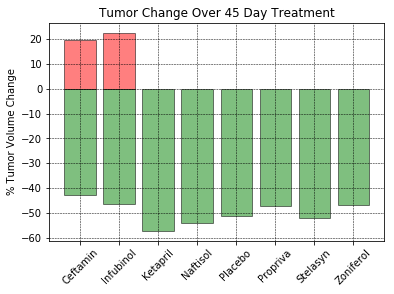

In [48]:
x_axis_pos = np.arange(len(positive))
x_axis_neg = np.arange(len(negative))
tick_locations_pos = [i + 0.4 for i in x_axis_pos]
plt.xticks(tick_locations_pos, drug_pos, rotation = '45')
plt.bar(x_axis_pos, positive, color='r', alpha=0.5, align="edge", edgecolor = "black")
tick_locations_neg = [i + 0.4 for i in x_axis_neg]
plt.xticks(tick_locations_neg, drug_neg, rotation = '45')
plt.bar(x_axis_neg, negative, color='g', alpha=0.5, align="edge", edgecolor = "black")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change") 
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.savefig("Tumor_Change_Over_45_Day_Treatment.png")